## Importacion de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

## Lectura de los datos

Se usa el metodo `.read_csv()`, para leer el aarchivo que contiene los datos en formato csv.

Adicionamos el parametro `index_col` al metodo, que nos permite decirle a **Pandas** que columna queremos que sea el indice de las filas.  

In [2]:
df = pd.read_csv("../data/covid_data.csv", index_col="Country")
df.head()

,State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,40626 1505,40687 1507,40768 1511,40833 1514,40937 1518,41032 1523,41145 1529,41268 1532,41334 1533,41425 1536
Albania,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,18250 465,18556 469,18858 473,19157 477,19445 480,19729 487,20040 493,20315 499,20634 502,20875 509
Algeria,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,55357 1888,55630 1897,55880 1907,56143 1914,56419 1922,56706 1931,57026 1941,57332 1949,57651 1956,57942 1964
Andorra,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,3811 63,4038 69,4038 69,4038 69,4325 72,4410 72,4517 72,4567 73,4665 75,4756 75
Angola,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,8582 260,8829 265,9026 267,9381 268,9644 270,9871 271,10074 275,10269 275,10558 279,10805 284


### Error en columnas
Se identifico que existe un posible error dentro del nombre de las columnas, existen columnas en formato `mm/dd/yy` y otras en formato `yyyy-mm-dd`, las primeras pertenecen al peridodo del anio 2020, y las otras a periodos anteriores al anio 2020.

Teniendo en cuenta el objetivo del proyecto se determino que las columnas con fechas en formato `yyyy-mm-dd`, que perteneces a periodos anteriores al anio 2020, sean omitidas de los datos a usar.

Si se imprime `df.columns`, se puede observar que existen **285 columnas** incluida la columna de *"State"*.

In [3]:
df.columns

Index(['State', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20',
       ...
       '10/22/20', '10/23/20', '10/24/20', '10/25/20', '10/26/20', '10/27/20',
       '10/28/20', '10/29/20', '10/30/20', '10/31/20'],
      dtype='object', length=285)

Se crea `columnsClear` una lista que contendra unicamente los indices de las columnas que cumplan con el formato `mm-dd-yyyy`.

> Adicionalmente se inicializa `columnsClear = [0,]` con la finalidad de que el indice de la columna *"State"* se contemple dentro de las columnas que se requiere mantener.

In [4]:
columnsClear = [0,]
patternColumn = re.compile(r"(\d+)/(\d+)/(\d+)")
columns = df.columns

for i in range(1, len(columns)):
    if patternColumn.match(columns[i]):
        columnsClear.append(i)

Una vez se obtienen los indices de las columnas correctas, tenemos como resultado: 

In [5]:
print(f"Numero de columnas nuevas: {len(columnsClear)}")

Numero de columnas nuevas: 177


Se obtiene una reduccion de **108** columnas erroneas.

### Correccion del error
Se realiza una extraccion de datos del `DataFrame` original, mediante el metodo `.iloc[rows, columns]` .

In [6]:
df_clean = df.iloc[:,columnsClear]
df_clean.head()

,State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,40626 1505,40687 1507,40768 1511,40833 1514,40937 1518,41032 1523,41145 1529,41268 1532,41334 1533,41425 1536
Albania,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,18250 465,18556 469,18858 473,19157 477,19445 480,19729 487,20040 493,20315 499,20634 502,20875 509
Algeria,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,55357 1888,55630 1897,55880 1907,56143 1914,56419 1922,56706 1931,57026 1941,57332 1949,57651 1956,57942 1964
Andorra,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,3811 63,4038 69,4038 69,4038 69,4325 72,4410 72,4517 72,4567 73,4665 75,4756 75
Angola,NaN,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,0 0,...,8582 260,8829 265,9026 267,9381 268,9644 270,9871 271,10074 275,10269 275,10558 279,10805 284


## Tratamiento de datos
Se identifica que los valores se encuntran en un string en formato `[numero][n spacios][numero]`, usando una expresion regular se extraen los valores y se convierten en tuplas `(contagios, muertes)`, despues se extrae cada uno de estos valores en una columan distinta.

### Definicion de la funcion

In [7]:
patternValues = re.compile(r"(\d+)(\s+)(\d+)")

def extractValue(value, pos=0):
    matchValues = patternValues.match(value)
    infections, _, deaths = matchValues.groups()
    infections = int(infections)
    deaths = int(deaths)
    return infections, deaths

Se applica la funcion a todo el `DataFrame` exepto la columna *"State"*.

In [8]:
df_clean.iloc[:,1:] = df_clean.iloc[:,1:].applymap(lambda x: extractValue(x))
df_clean.head()

,State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)",...,"(40626, 1505)","(40687, 1507)","(40768, 1511)","(40833, 1514)","(40937, 1518)","(41032, 1523)","(41145, 1529)","(41268, 1532)","(41334, 1533)","(41425, 1536)"
Albania,NaN,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)",...,"(18250, 465)","(18556, 469)","(18858, 473)","(19157, 477)","(19445, 480)","(19729, 487)","(20040, 493)","(20315, 499)","(20634, 502)","(20875, 509)"
Algeria,NaN,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)",...,"(55357, 1888)","(55630, 1897)","(55880, 1907)","(56143, 1914)","(56419, 1922)","(56706, 1931)","(57026, 1941)","(57332, 1949)","(57651, 1956)","(57942, 1964)"
Andorra,NaN,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)",...,"(3811, 63)","(4038, 69)","(4038, 69)","(4038, 69)","(4325, 72)","(4410, 72)","(4517, 72)","(4567, 73)","(4665, 75)","(4756, 75)"
Angola,NaN,"(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)","(0, 0)",...,"(8582, 260)","(8829, 265)","(9026, 267)","(9381, 268)","(9644, 270)","(9871, 271)","(10074, 275)","(10269, 275)","(10558, 279)","(10805, 284)"


## Graficacion de datos

In [9]:
def getNewDataFrameFromCountry(serie: pd.Series):
    data = {"infections": [], "deaths": []}

    for values in serie:
        data["infections"].append(values[0])
        data["deaths"].append(values[1])
    
    return pd.DataFrame(data, index=serie.index)


In [42]:
sampleGroup = df_clean.loc["Spain"][1:]
sampleGroup

1/22/20               (0, 0)
1/23/20               (0, 0)
1/24/20               (0, 0)
1/25/20               (0, 0)
1/26/20               (0, 0)
                  ...       
10/27/20    (1116738, 35298)
10/28/20    (1136503, 35466)
10/29/20    (1160083, 35639)
10/30/20    (1185678, 35878)
10/31/20    (1185678, 35878)
Name: Spain, Length: 176, dtype: object

In [43]:
sampleData = getNewDataFrameFromCountry(sampleGroup)
sampleData

,infections,deaths
1/22/20,0,0
1/23/20,0,0
1/24/20,0,0
1/25/20,0,0
1/26/20,0,0
...,...,...
10/27/20,1116738,35298
10/28/20,1136503,35466
10/29/20,1160083,35639
10/30/20,1185678,35878


In [35]:
xLabels = [f"{i}/1/20" for i in range(1, 13)]
xLabels

['1/1/20',
 '2/1/20',
 '3/1/20',
 '4/1/20',
 '5/1/20',
 '6/1/20',
 '7/1/20',
 '8/1/20',
 '9/1/20',
 '10/1/20',
 '11/1/20',
 '12/1/20']

In [44]:
title = f"Daily number of Cases and Deaths in {sampleGroup.name} (14-day mean)"

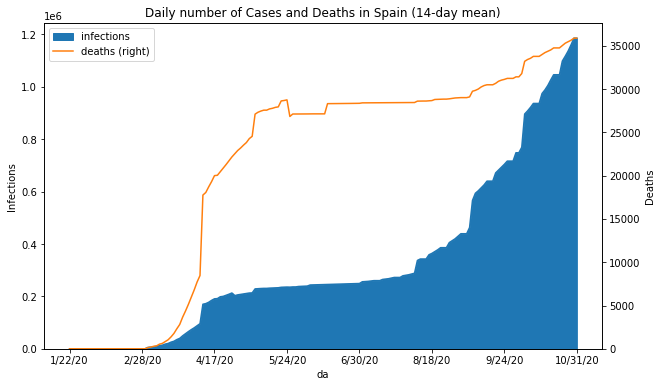

In [45]:
plt.figure(figsize=(10, 6),)
plt.title(title)

afgI= sampleData.infections.plot( x=xLabels, kind="area", legend=True)
afgI.set_ylabel("Infections")
afgI.set_ylim(bottom=0)
afgI.set_xlabel("da")

afgD = sampleData.deaths.plot( x=xLabels, secondary_y=True, kind="line", legend=True)
afgD.set_ylabel("Deaths")
afgD.set_ylim(bottom=0)

plt.show()